## Voter model

Pull
- a “listener” node is randomly chosen from the network
- a “speaker” node is randomly chosen from the listener’s neighbors.

Push
- a “speaker” node is randomly chosen from the network
- a “listener” node is randomly chosen from the speaker’s neighbors.

Edge-based
- an edge is randomly chosen from the network
- n the two endpoints (nodes) of the edge are randomly assigned to be a “speaker” and a “listener”.


Pull model example code

In [1]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
np.random.choice([1,2,3,4], 6)

array([4, 1, 3, 2, 1, 3])

In [3]:
random.choice([1,2,3,4])

2

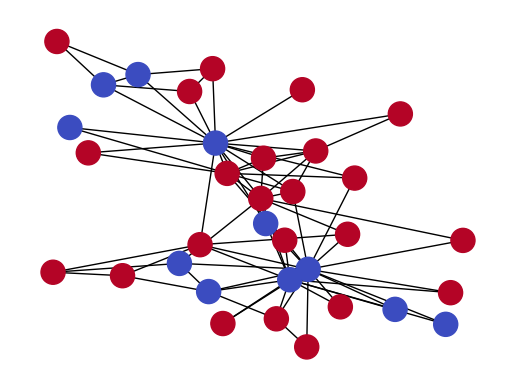

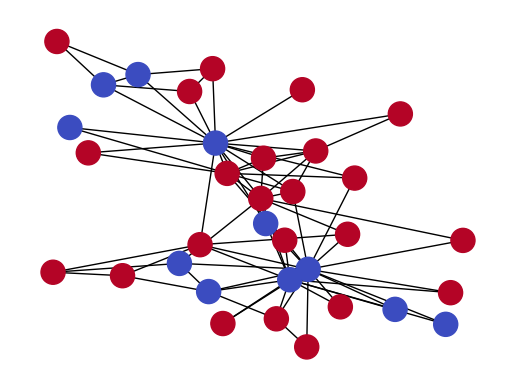

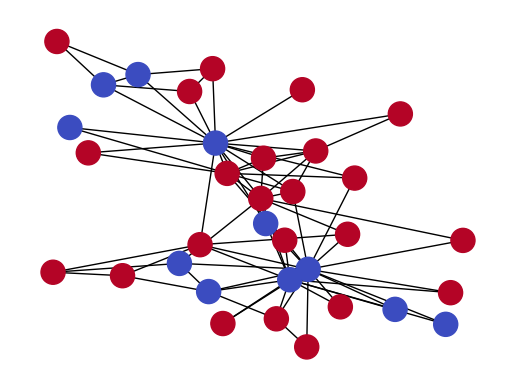

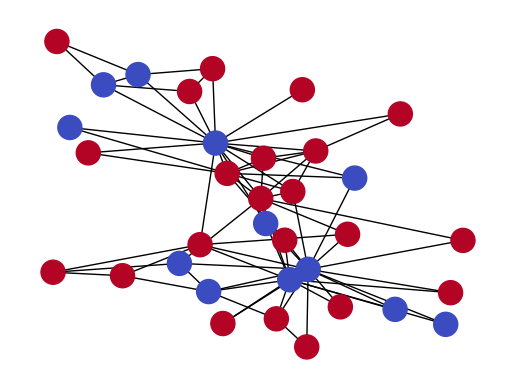

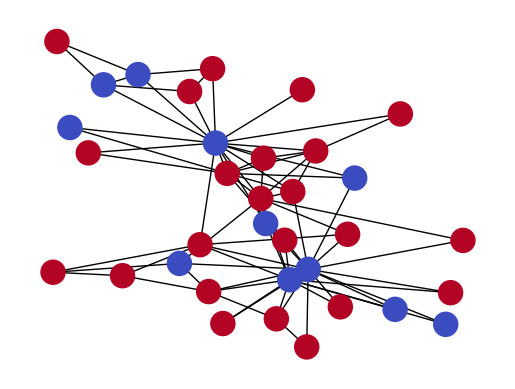

In [4]:
# initialize a graph

g = nx.karate_club_graph()
pos = nx.spring_layout(g)

np.random.seed(20)
init_state = np.where(np.random.randn(len(g.nodes)) < 0.5, 1, 0)

for i in g.nodes():
    g.nodes[i]['state'] = init_state[i]
    
nextg = g.copy()

# simulate
for _ in range(5):
    listener = random.choice(list(g.nodes()))
    speaker = random.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
    plt.cla()
    nx.draw(g, cmap=plt.cm.coolwarm, vmin=0, vmax=1,
            node_color=[g.nodes[n]['state'] for n in g.nodes()],
            pos=pos)
    plt.show()

In [5]:
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

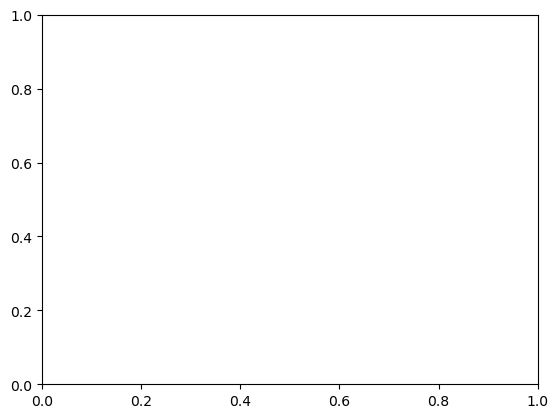

In [6]:
# initialize a graph
g = nx.karate_club_graph()
pos = nx.circular_layout(g)

np.random.seed(20)
init_state = np.where(np.random.randn(len(g.nodes)) < 0.5, 1, 0)

for i in g.nodes():
    g.nodes[i]['state'] = init_state[i]

# Initial drawing
plt.cla()
fig, ax = plt.subplots(figsize=(6,6))
plt.close()

# simulate
def animate(frame):
    global g, nextg
    ax.clear()
    
    listener = random.choice(list(g.nodes()))
    speaker = random.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
        
    plt.cla()
    nx.draw(g, cmap=plt.cm.coolwarm, vmin=0, vmax=1,
            node_color=[g.nodes[n]['state'] for n in g.nodes()],
            pos=pos,
            ax=ax)
    plt.close()

In [7]:
anim = animation.FuncAnimation(fig, animate, frames=100, interval=100)

In [8]:
anim

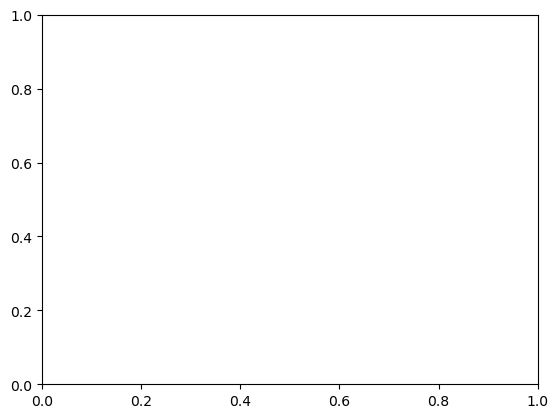

In [9]:
# initialize a graph
g = nx.gnm_random_graph(500, 1000, seed=42)
pos = nx.circular_layout(g)

np.random.seed(20)
init_state = np.where(np.random.randn(len(g.nodes)) < 0.5, 1, 0)

for i in g.nodes():
    g.nodes[i]['state'] = init_state[i]

# Initial drawing
plt.cla()
fig, ax = plt.subplots(figsize=(10,10))
plt.close()

# simulate
def animate(frame):
    global g, nextg
    ax.clear()
    
    listener = random.choice(list(g.nodes()))
    if len(list(g.neighbors(listener))) > 0:
        speaker = random.choice(list(g.neighbors(listener)))
        g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
        
    plt.cla()
    nx.draw(g, cmap=plt.cm.binary, vmin=0, vmax=1,
            node_color=[g.nodes[n]['state'] for n in g.nodes()],
            pos=pos, node_size=10, ax=ax, alpha=0.5, width=0.1)
    plt.close()

In [10]:
anim = animation.FuncAnimation(fig, animate, frames=1000, interval=10)

In [11]:
anim